In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Conv3D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]



In [4]:
print(X_train.shape)

(50000, 28, 28)


In [5]:
print(y_train.shape)

(50000,)


In [6]:
#reshape kich thuoc
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
#chuyen label Y từ chuỗi số thành ma trận theo vị trí của label
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("Data Y before ", y_train[0])
print("Data Y after ", Y_train[0])

Data Y before  5
Data Y after  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# call model Sequential
model = Sequential()

In [9]:
# thêm các Convolution layer, 32 kernel, kích thước 3*3
# dùng sigmoid làm hàm kích hoạt( activation) input khi layer đầu là 28*28

model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

In [10]:
#add other Convolution layter
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
#add max pooling layer

model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#add Flatten layer, convert tensor to vector
model.add(Flatten())

In [15]:
#add Fully connected layer with 128 node and using sigmoid
model.add(Dense(128, activation='sigmoid'))

In [16]:
#output layer with 10 layout and using softmax to convert probability
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

In [18]:
#compile model, find lossfunction used and optimal loss function
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [19]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs = 10, verbose =1)

Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.2819 - accuracy: 0.9182 - val_loss: 0.0720 - val_accuracy: 0.9798
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.0476 - val_accuracy: 0.9866
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.0435 - val_accuracy: 0.9871
Epoch 5/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.0162 - accuracy: 0.9955 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 6/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0370 - val_accuracy: 0.9889
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.0448 -

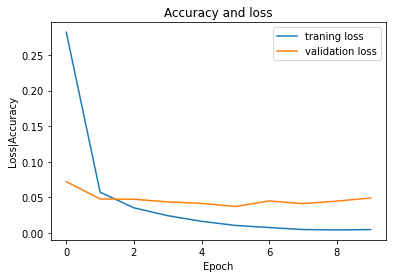

In [20]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label = 'traning loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label = 'validation loss')
#plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label = 'accuracy')
#plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label = 'validation accuracy')
plt.title('Accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.040856145322322845, 0.9883000254631042]


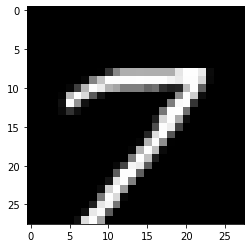

 Predict is 7


In [22]:
plt.imshow(X_test[6666].reshape(28, 28), cmap='gray')
plt.show()
y_predict = model.predict(X_test[6666].reshape(1, 28, 28, 1))
print(' Predict is', np.argmax(y_predict))

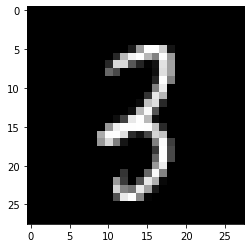

 Predict is 3


In [25]:
plt.imshow(X_test[515].reshape(28, 28), cmap='gray')
plt.show()
y_predict = model.predict(X_test[515].reshape(1, 28, 28, 1))
print(' Predict is', np.argmax(y_predict))
